In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

import matplotlib as mpl
import matplotlib.pyplot as plt
import numba
import numpy as np
import pandas as pd
import seaborn as sns
import xarray as xr
from chspy import join
from models.model_input import (
    OrnsteinUhlenbeckProcess,
    SquareInput,
    StepInput,
    ZeroInput,
)
from models.thalamus import DEFAULT_PARAMS_TCR, DEFAULT_PARAMS_TRN, ThalamicNetworkNode

DPI = 75
CMAP = "plasma"
plt.rcParams["figure.figsize"] = (20, 9)
plt.style.use("default_light")

In [31]:
def simulate(tcr_noise=0.0, stim_inp=0.0, glk=0.033, gh=0.062, period=10000):
    tcr_params = {**DEFAULT_PARAMS_TCR, "g_LK": glk, "g_h": gh}
    trn_params = {**DEFAULT_PARAMS_TRN, "g_LK": glk}

    # all times in ms
    duration = 35000.0
    t_spin_up = 0.0
    dt = 1.0

    # init model
    model = ThalamicNetworkNode(tcr_parameters=tcr_params, trn_parameters=trn_params)
    model.index = 0
    model.idx_state_var = 0
    model.init_node()
    stim = SquareInput(
        duration + t_spin_up,
        dt=dt,
        stim_start=None,
        amplitude=stim_inp / 1000.0,
        period=period,
    )

    tcr_input = OrnsteinUhlenbeckProcess(
        duration=duration + t_spin_up, dt=dt, mu=0.0, sigma=tcr_noise, tau=5.0
    ).as_cubic_splines()
    tcr_input.plus(stim.as_cubic_splines())

    trn_input = ZeroInput(duration + t_spin_up, dt).as_cubic_splines()
    trn_input.plus(stim.as_cubic_splines())

    results = model.run(
        duration=duration,
        sampling_dt=dt,
        noise_input=join(tcr_input, trn_input),
        time_spin_up=t_spin_up,
        backend="jitcdde",
    )
    tcr = results["q_mean_EXC"].isel({"node": 0}) * 1000.0
    trn = results["q_mean_INH"].isel({"node": 0}) * 1000.0
    results_df = pd.DataFrame(
        {
            "TCR": tcr.values,
            "TRN": trn.values,
            "stim_input": tcr_input.get_state(results.time.values * 1000.0).squeeze()
            * 1000.0,
        },
        index=tcr.time,
    )
    results_df.index.name = "time"
    return results_df.loc[5:None]

In [32]:
def plot_single(df, ax):
    ax.plot(df.index, df["TRN"], color="C1", alpha=0.7)
    ax.plot(df.index, df["TCR"], color="C0", alpha=0.7)
    sns.despine(trim=True, ax=ax)
    ax2 = ax.twinx()
    ax2.plot(df.index, df["stim_input"], color="k", linewidth=3.0, alpha=0.9)
    ax2.set_ylim([-10, 400.0])
    ax2.set_yticks([])
    sns.despine(trim=False, ax=ax2)

/Users/nikola/.virtualenvs/sleepy/lib/python3.7/site-packages/jitcdde/_jitcdde.py:1491: UserWarning: Your input past does not begin at t=0 but at t=1.0. Values before the beginning of the past will be extrapolated. You very likely do not want this.
  warn(f"Your input past does not begin at t=0 but at t={input[0].time}. Values before the beginning of the past will be extrapolated. You very likely do not want this.")


Using default integration parameters.


100%|██████████| 35000/35000 [00:00<00:00, 84895.02it/s]
/Users/nikola/.virtualenvs/sleepy/lib/python3.7/site-packages/jitcdde/_jitcdde.py:1491: UserWarning: Your input past does not begin at t=0 but at t=1.0. Values before the beginning of the past will be extrapolated. You very likely do not want this.
  warn(f"Your input past does not begin at t=0 but at t={input[0].time}. Values before the beginning of the past will be extrapolated. You very likely do not want this.")


Using default integration parameters.


100%|██████████| 35000/35000 [00:00<00:00, 88760.82it/s]
/Users/nikola/.virtualenvs/sleepy/lib/python3.7/site-packages/jitcdde/_jitcdde.py:1491: UserWarning: Your input past does not begin at t=0 but at t=1.0. Values before the beginning of the past will be extrapolated. You very likely do not want this.
  warn(f"Your input past does not begin at t=0 but at t={input[0].time}. Values before the beginning of the past will be extrapolated. You very likely do not want this.")


Using default integration parameters.


100%|██████████| 35000/35000 [00:00<00:00, 42034.71it/s]
/Users/nikola/.virtualenvs/sleepy/lib/python3.7/site-packages/jitcdde/_jitcdde.py:1491: UserWarning: Your input past does not begin at t=0 but at t=1.0. Values before the beginning of the past will be extrapolated. You very likely do not want this.
  warn(f"Your input past does not begin at t=0 but at t={input[0].time}. Values before the beginning of the past will be extrapolated. You very likely do not want this.")


Using default integration parameters.


100%|██████████| 35000/35000 [00:00<00:00, 41731.85it/s]
/Users/nikola/.virtualenvs/sleepy/lib/python3.7/site-packages/jitcdde/_jitcdde.py:1491: UserWarning: Your input past does not begin at t=0 but at t=1.0. Values before the beginning of the past will be extrapolated. You very likely do not want this.
  warn(f"Your input past does not begin at t=0 but at t={input[0].time}. Values before the beginning of the past will be extrapolated. You very likely do not want this.")


Using default integration parameters.


100%|██████████| 35000/35000 [00:00<00:00, 83113.27it/s]
/Users/nikola/.virtualenvs/sleepy/lib/python3.7/site-packages/jitcdde/_jitcdde.py:1491: UserWarning: Your input past does not begin at t=0 but at t=1.0. Values before the beginning of the past will be extrapolated. You very likely do not want this.
  warn(f"Your input past does not begin at t=0 but at t={input[0].time}. Values before the beginning of the past will be extrapolated. You very likely do not want this.")


Using default integration parameters.


100%|██████████| 35000/35000 [00:00<00:00, 87505.72it/s]
/Users/nikola/.virtualenvs/sleepy/lib/python3.7/site-packages/jitcdde/_jitcdde.py:1491: UserWarning: Your input past does not begin at t=0 but at t=1.0. Values before the beginning of the past will be extrapolated. You very likely do not want this.
  warn(f"Your input past does not begin at t=0 but at t={input[0].time}. Values before the beginning of the past will be extrapolated. You very likely do not want this.")


Using default integration parameters.


100%|██████████| 35000/35000 [00:00<00:00, 41487.73it/s]
/Users/nikola/.virtualenvs/sleepy/lib/python3.7/site-packages/jitcdde/_jitcdde.py:1491: UserWarning: Your input past does not begin at t=0 but at t=1.0. Values before the beginning of the past will be extrapolated. You very likely do not want this.
  warn(f"Your input past does not begin at t=0 but at t={input[0].time}. Values before the beginning of the past will be extrapolated. You very likely do not want this.")


Using default integration parameters.


100%|██████████| 35000/35000 [00:00<00:00, 41286.34it/s]
/Users/nikola/.virtualenvs/sleepy/lib/python3.7/site-packages/jitcdde/_jitcdde.py:1491: UserWarning: Your input past does not begin at t=0 but at t=1.0. Values before the beginning of the past will be extrapolated. You very likely do not want this.
  warn(f"Your input past does not begin at t=0 but at t={input[0].time}. Values before the beginning of the past will be extrapolated. You very likely do not want this.")


Using default integration parameters.


100%|██████████| 35000/35000 [00:00<00:00, 80936.08it/s]
/Users/nikola/.virtualenvs/sleepy/lib/python3.7/site-packages/jitcdde/_jitcdde.py:1491: UserWarning: Your input past does not begin at t=0 but at t=1.0. Values before the beginning of the past will be extrapolated. You very likely do not want this.
  warn(f"Your input past does not begin at t=0 but at t={input[0].time}. Values before the beginning of the past will be extrapolated. You very likely do not want this.")


Using default integration parameters.


100%|██████████| 35000/35000 [00:00<00:00, 83700.46it/s]
/Users/nikola/.virtualenvs/sleepy/lib/python3.7/site-packages/jitcdde/_jitcdde.py:1491: UserWarning: Your input past does not begin at t=0 but at t=1.0. Values before the beginning of the past will be extrapolated. You very likely do not want this.
  warn(f"Your input past does not begin at t=0 but at t={input[0].time}. Values before the beginning of the past will be extrapolated. You very likely do not want this.")


Using default integration parameters.


100%|██████████| 35000/35000 [00:00<00:00, 42509.20it/s]
/Users/nikola/.virtualenvs/sleepy/lib/python3.7/site-packages/jitcdde/_jitcdde.py:1491: UserWarning: Your input past does not begin at t=0 but at t=1.0. Values before the beginning of the past will be extrapolated. You very likely do not want this.
  warn(f"Your input past does not begin at t=0 but at t={input[0].time}. Values before the beginning of the past will be extrapolated. You very likely do not want this.")


Using default integration parameters.


100%|██████████| 35000/35000 [00:00<00:00, 40278.20it/s]


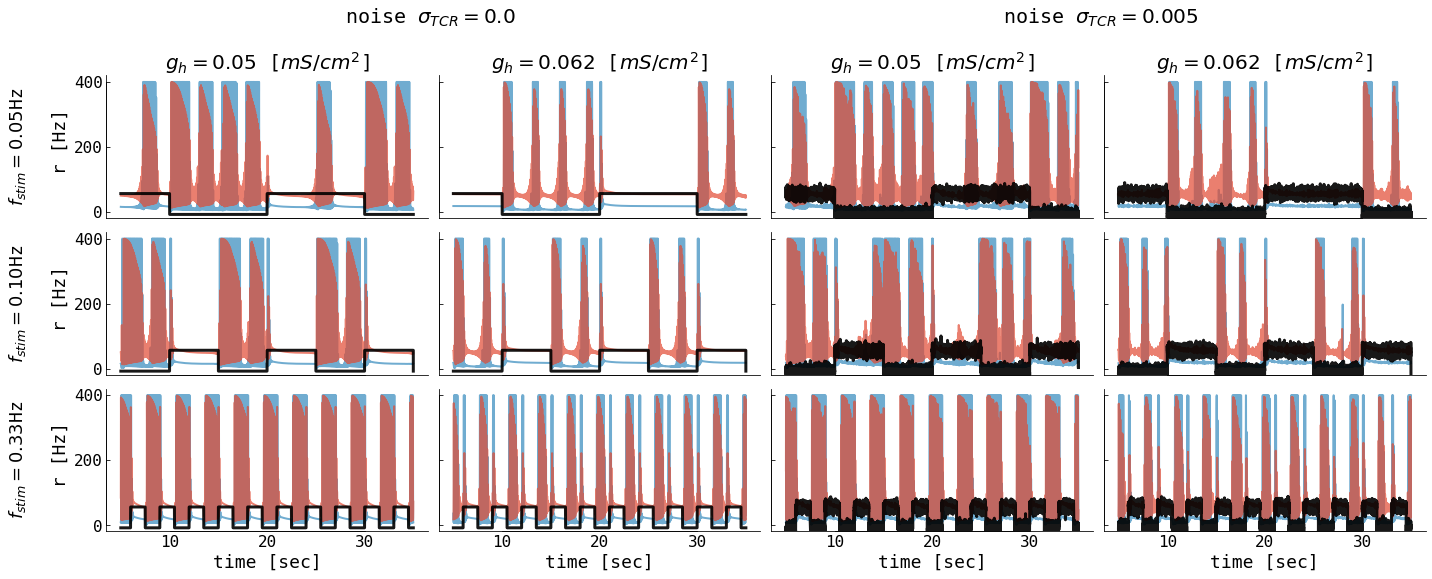

In [33]:
periods = [20000, 10000, 3000]
noises = [0.0, 0.005]
ghs = [0.05, 0.062]

fig, axs = plt.subplots(
    ncols=len(noises) * len(ghs),
    nrows=len(ratios),
    sharex=True,
    sharey=True,
    figsize=(20, 8.5),
)

for i, period in enumerate(periods):
    for j, noise in enumerate(noises):
        for k, gh in enumerate(ghs):
            df = simulate(stim_inp=30.0, period=period, gh=gh, tcr_noise=noise)
            ax = axs[i, 2 * j + k]
            plot_single(df, ax)
            if i == 2:
                ax.set_xlabel("time [sec]")
            if i == 0:
                ax.set_title(f"$g_{{h}}={gh}$ [$mS/cm^2$]")
            if j + k == 0:
                ax.set_ylabel(
                    f"$f_{{stim}}={1/(period / 1000.):.2f}$Hz"
                    "\n\n r [Hz]"
                )
for j, noise in enumerate(noises):
    ax_tit = fig.add_subplot(1, 2, j + 1, frameon=False)
    ax_tit.set_title(f"noise $\sigma_{{TCR}}={noise}$ \n\n")
    ax_tit.set_xticks([])
    ax_tit.set_yticks([])
plt.tight_layout()
# to PDF due transparency
plt.savefig(
    "../figs/thalamus_square_stim_ts.pdf", dpi=DPI, transparent=True, bbox_inches="tight"
)